In [102]:
#%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(city_data_df, ride_data_df, how='left', on="city")

# Display the data table for preview
pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [103]:
pyber_df = pyber_df[['city', 'date','fare', 'ride_id', 'driver_count', 'type']]

In [104]:
pyber_df["Nbr of Rides"] = 1
pyber_df.head()

,city,date,fare,ride_id,driver_count,type,Nbr of Rides
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban,1
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban,1
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban,1
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban,1
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban,1


In [105]:
pyber_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
Nbr of Rides      int64
dtype: object

In [106]:
city_group = pyber_df.groupby('type')['fare'].sum()
city_rides = pyber_df.groupby('type')['fare'].count()
city_types = ['Urban', 'Suburban', 'Rural']

print("city_group", city_group)
print("city_rides", city_rides)
print("city_types", city_types)

city_group type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64
city_rides type
Rural        125
Suburban     625
Urban       1625
Name: fare, dtype: int64
city_types ['Urban', 'Suburban', 'Rural']


In [107]:
#  want this to just print city type
city_category = pyber_df.groupby('city')['type'].first()

rides_by_city = pyber_df.groupby('city')['fare'].count()
average_by_city = pyber_df.groupby('city')['fare'].mean()

rides_count_city = pyber_df.groupby('city')['Nbr of Rides'].sum()
ride_sharing_df = pd.DataFrame(rides_by_city)

ride_sharing_df.head()

,fare
city,
Amandaburgh,18
Barajasview,22
Barronchester,16
Bethanyland,18
Bradshawfurt,10


In [108]:
ride_sharing_df['Average Fare by City'] = average_by_city
ride_sharing_df['City Category'] = city_category
ride_sharing_df['Nbr of Rides'] = rides_count_city
ride_sharing_df = ride_sharing_df.rename(columns={'fare': 'Rides'})
ride_sharing_df.head()

,Rides,Average Fare by City,City Category,Nbr of Rides
city,,,,
Amandaburgh,18,24.641667,Urban,18
Barajasview,22,25.332273,Urban,22
Barronchester,16,36.422500,Suburban,16
Bethanyland,18,32.956111,Suburban,18
Bradshawfurt,10,40.064000,Rural,10


In [109]:
# testing putting driver # back into the city lines
ride_sharing_df = pd.merge(ride_sharing_df, city_data_df, how='left', on="city")
ride_sharing_df.head()

,city,Rides,Average Fare by City,City Category,Nbr of Rides,driver_count,type
0,Amandaburgh,18,24.641667,Urban,18,12,Urban
1,Barajasview,22,25.332273,Urban,22,26,Urban
2,Barronchester,16,36.422500,Suburban,16,11,Suburban
3,Bethanyland,18,32.956111,Suburban,18,22,Suburban
4,Bradshawfurt,10,40.064000,Rural,10,7,Rural


In [110]:
ride_sharing_df = ride_sharing_df.rename(columns={'driver_count': 'Nbr of Drivers'})
ride_sharing_df.head()

,city,Rides,Average Fare by City,City Category,Nbr of Rides,Nbr of Drivers,type
0,Amandaburgh,18,24.641667,Urban,18,12,Urban
1,Barajasview,22,25.332273,Urban,22,26,Urban
2,Barronchester,16,36.422500,Suburban,16,11,Suburban
3,Bethanyland,18,32.956111,Suburban,18,22,Suburban
4,Bradshawfurt,10,40.064000,Rural,10,7,Rural


In [111]:
drivers_by_city = ride_sharing_df.groupby('city')['Nbr of Drivers'].sum()

In [112]:
# need to separate ride_sharing_df into 3 df's by type
urban_ride_sharing_df = ride_sharing_df.loc[ride_sharing_df['City Category'] == "Urban"]
suburban_ride_sharing_df = ride_sharing_df.loc[ride_sharing_df['City Category'] == "Suburban"]
rural_ride_sharing_df = ride_sharing_df.loc[ride_sharing_df['City Category'] == "Rural"]

rural_ride_sharing_df.head()

,city,Rides,Average Fare by City,City Category,Nbr of Rides,Nbr of Drivers,type
4,Bradshawfurt,10,40.064000,Rural,10,7,Rural
17,Garzaport,3,24.123333,Rural,3,7,Rural
20,Harringtonfort,6,33.470000,Rural,6,4,Rural
24,Jessicaport,6,36.013333,Rural,6,1,Rural
33,Lake Jamie,6,34.358333,Rural,6,4,Rural


In [113]:
rides_by_urban = urban_ride_sharing_df.groupby('city')['Nbr of Rides'].sum()
average_by_urban = urban_ride_sharing_df.groupby('city')['Average Fare by City'].mean()
rides_by_suburban = suburban_ride_sharing_df.groupby('city')['Nbr of Rides'].sum()
average_by_suburban = suburban_ride_sharing_df.groupby('city')['Average Fare by City'].mean()
rides_by_rural = rural_ride_sharing_df.groupby('city')['Nbr of Rides'].sum()
average_by_rural = rural_ride_sharing_df.groupby('city')['Average Fare by City'].mean()

drivers_urban = urban_ride_sharing_df['Nbr of Drivers']
drivers_suburban = suburban_ride_sharing_df['Nbr of Drivers']
drivers_rural = rural_ride_sharing_df['Nbr of Drivers']

In [114]:
print("rides_by_urban", rides_by_urban.count())
print("average_by_urban", average_by_urban.count())
print("rides_by_suburban", rides_by_suburban.count())
print("average_by_suburban", average_by_suburban.count())
print("averrides_by_ruralage_by_urban", rides_by_rural.count())
print("average_by_rural", average_by_rural.count())

rides_by_urban 66
average_by_urban 66
rides_by_suburban 36
average_by_suburban 36
averrides_by_ruralage_by_urban 18
average_by_rural 18


In [115]:
city_group_df = pd.DataFrame(city_group)

city_group_df['Nbr of Rides'] = city_rides
city_group_df['Ave Fare'] = city_group_df['fare'] / city_group_df['Nbr of Rides']

city_group_df

,fare,Nbr of Rides,Ave Fare
type,,,
Rural,4327.93,125,34.623440
Suburban,19356.33,625,30.970128
Urban,39854.38,1625,24.525772


In [116]:
city_group_df = city_group_df.rename(columns={'fare': 'Fare'})

In [117]:
total_fares = city_group_df['Fare'].sum()
total_rides = pyber_df['fare'].count()

print("total_fares", total_fares)
print("total_rides", total_rides)

total_fares 63538.63999999999
total_rides 2375


In [118]:
city_group_df['% of Total Fare'] = (city_group_df['Fare'] / total_fares)*100
city_group_df

,Fare,Nbr of Rides,Ave Fare,% of Total Fare
type,,,,
Rural,4327.93,125,34.623440,6.811493
Suburban,19356.33,625,30.970128,30.463872
Urban,39854.38,1625,24.525772,62.724635


In [119]:
city_group_df.dtypes

Fare               float64
Nbr of Rides         int64
Ave Fare           float64
% of Total Fare    float64
dtype: object

In [120]:
city_group_df.reset_index(level=0, inplace=True)
city_group_df = city_group_df.rename(columns={'fare': 'Fare'})
city_group_df.head()

,type,Fare,Nbr of Rides,Ave Fare,% of Total Fare
0,Rural,4327.93,125,34.623440,6.811493
1,Suburban,19356.33,625,30.970128,30.463872
2,Urban,39854.38,1625,24.525772,62.724635


In [121]:
urban_fares = city_group_df.loc[city_group_df.type == "Urban", "Fare"].sum()
suburban_fares = city_group_df.loc[city_group_df.type == "Suburban", "Fare"].sum()
rural_fares = city_group_df.loc[city_group_df.type == "Rural", "Fare"].sum()

urban_rides = ride_sharing_df.loc[ride_sharing_df.type == "Urban", "Rides"].sum()
suburban_rides = ride_sharing_df.loc[ride_sharing_df.type == "Suburban", "Rides"].sum()
rural_rides = ride_sharing_df.loc[ride_sharing_df.type == "Rural", "Rides"].sum()

urban_drivers = ride_sharing_df.loc[ride_sharing_df.type == "Urban", "Nbr of Drivers"].sum()
suburban_drivers = ride_sharing_df.loc[ride_sharing_df.type == "Suburban", "Nbr of Drivers"].sum()
rural_drivers = ride_sharing_df.loc[ride_sharing_df.type == "Rural", "Nbr of Drivers"].sum()

print("urban_fares", urban_fares)
print("suburban_fares", suburban_fares)
print("rural_fares", rural_fares)
print("urban_rides", urban_rides)
print("suburban_rides", suburban_rides)
print("rural_rides", rural_rides)
print("urban_drivers", urban_drivers)
print("suburban_drivers", suburban_drivers)
print("rural_drivers", rural_drivers)

urban_fares 39854.38
suburban_fares 19356.329999999994
rural_fares 4327.93
urban_rides 1625
suburban_rides 625
rural_rides 125
urban_drivers 2405
suburban_drivers 490
rural_drivers 78


## Bubble Plot of Ride Sharing Data

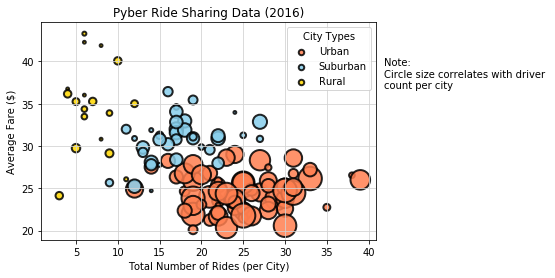

In [131]:
# Obtain the x and y coordinates for each of the three city types
max_rides = rides_by_city.max()
min_rides = rides_by_city.min()
max_fare = average_by_city.max()
min_fare = average_by_city.min()
x_limit = max_rides+1
y_limit = max_fare+1
x_axis_urban = rides_by_urban
y_axis_urban = average_by_urban
x_axis_suburban = rides_by_suburban
y_axis_suburban = average_by_suburban
x_axis_rural = rides_by_rural
y_axis_rural = average_by_rural


# s = drivers_by_city
# both x and y have 120 data points
x_label = "Total Number of Rides (per City)"
y_label = "Average Fare ($)"
bubble_title = "Pyber Ride Sharing Data (2016)"

bubble_labels = ["Urban", "Suburban", "Rural"]
bubble_colors = ["gold", "skyblue", "coral"]


# Build the scatter plots for each city types - requires 3 versions of variables

plt.scatter(x_axis_urban, y_axis_urban, marker="o", facecolors="coral", 
            edgecolor="black", s=(drivers_urban*8), alpha=0.85, linewidth=2)
plt.scatter(x_axis_suburban, y_axis_suburban, marker="o", facecolors="skyblue", 
            edgecolor="black", s=(drivers_suburban*8), alpha=0.85, linewidth=2)
plt.scatter(x_axis_rural, y_axis_rural, marker="o", facecolors="gold", 
            edgecolor="black", s=(drivers_rural*8), alpha=0.85, linewidth=2)

plt.rc('grid', linestyle="-", color='lightgrey')
plt.grid()
plt.title(bubble_title)
plt.xlabel(x_label)
plt.ylabel(y_label)
#plt.show()

# Incorporate the other graph properties


# Create a legend
bubble_legend = plt.legend(bubble_labels, loc="best", fontsize = 'medium',
                           fancybox=True, title="City Types", handlelength= 2, markerscale=6)
for handle in bubble_legend.legendHandles:
    handle.set_sizes([30.0])

# Incorporate a text label regarding circle size

text = "Note: \nCircle size correlates with driver \ncount per city"
plt.figtext(.92,.65,text)

# Save Figure
plt.savefig("../Images/Pyber_ride_sharing.png")

# Show plot - example
plt.show()

## Total Fares by City Type

In [123]:
# Calculate Type Percents - total fares by city type
suburban_percent = (suburban_fares/total_fares)*100
urban_percent = (urban_fares/total_fares)*100
rural_percent = (rural_fares/total_fares)*100
print(suburban_percent)
print(urban_percent)
print(rural_percent)


30.463872062732218
62.72463496228438
6.8114929749834126


In [124]:
# Build Pie Chart - total fares by city type
labels = ["Urban", "Rural", "Suburban"]
sizes = [urban_percent, rural_percent, suburban_percent]
colors = ["coral", "gold", "skyblue"]
explode = (0.1, 0.1, 0.1)
pie1_title = "% of Total Fares by City Type"

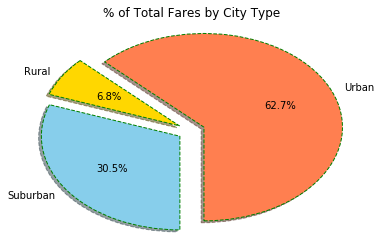

In [125]:
# Show Figure - total fares by city type
#plt.pie(sizes, explode = explode, labels = labels, colors = colors, 
#        autopct = "%1.1f%%", shadow = True, startangle=140)
plt.pie(sizes, 
        explode = explode, 
        labels = labels, 
        colors = colors, 
        autopct = "%1.1f%%", 
        shadow = True, 
        startangle=270, 
        wedgeprops={"edgecolor":"green",'linewidth': 1, 'linestyle': 'dashed', 'antialiased': True})

plt.title(pie1_title)
#plt.legend(labels, loc="lower right")
plt.axis('auto')

# Save Figure
plt.savefig("../Images/PyPies_fares.png")

# show the chart
plt.show()

## Total Rides by City Type

In [126]:
# Calculate Ride Percents - total rides by city type
s_rides_percent = (suburban_rides/total_rides)*100
u_rides_percent = (urban_rides/total_rides)*100
r_rural_percent = (rural_rides/total_rides)*100
print(s_rides_percent)
print(u_rides_percent)
print(r_rural_percent)

# Build Pie Chart
labels = ["Suburban", "Urban", "Rural"]
sizes = [s_rides_percent, u_rides_percent, r_rural_percent]
colors = ["skyblue", "coral", "yellow"]
explode = (0.1, 0.1, 0.1)
depths = [30, 20, 10]
pie2_title = "% of Total Rides by City Type"


26.31578947368421
68.42105263157895
5.263157894736842


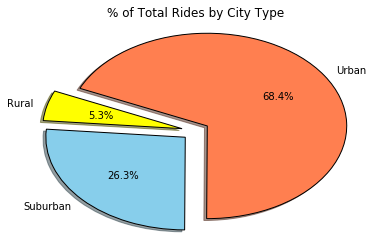

In [127]:
# Show Figure - total fares by city type
plt.pie(sizes, 
        explode = explode, 
        labels = labels, 
        colors = colors, 
        autopct = "%1.1f%%", 
        shadow = True, 
        startangle =175,
        wedgeprops={"edgecolor":"black",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
#plt.legend(labels, loc="upper left")
plt.axis('auto')
plt.title(pie2_title)

# Save Figure
plt.savefig("../Images/PyPies_rides.png")

# display the pie chart
plt.show()

## Total Drivers by City Type

In [128]:
total_drivers = drivers_by_city.sum()

In [129]:
# Calculate Ride Percents - total drivers by city type
s_rides_percent = (suburban_drivers/total_drivers)*100
u_rides_percent = (urban_drivers/total_drivers)*100
r_rural_percent = (rural_drivers/total_drivers)*100

print(s_rides_percent)
print(u_rides_percent)
print(r_rural_percent)

# Build Pie Chart
labels = ["Suburban", "Urban", "Rural"]
sizes = [s_rides_percent, u_rides_percent, r_rural_percent]
colors = ["skyblue", "coral", "gold"]
explode = (0.0, 0.1, 0.0)
pie3_title = "% of Total Drivers by City Type"


16.481668348469558
80.89471913891691
2.6236125126135215


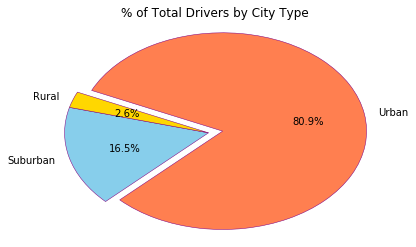

In [130]:
# Show Figure - total drivers by city type
plt.pie(sizes, 
        explode = explode, 
        labels = labels, 
        colors = colors, 
        autopct = "%1.1f%%", 
        shadow = False, 
        startangle = 165,
        wedgeprops={"edgecolor":"purple",'linewidth': 0.5, 'linestyle': 'solid', 'antialiased': True})
#plt.legend(labels, loc="best")
plt.axis('auto')
plt.title(pie3_title)

# Save Figure
plt.savefig("../Images/PyPies_drivers.png")

# display the pie chart
plt.show()